<a href="https://colab.research.google.com/github/Dimas0824/PCVK/blob/main/Pertemuan2/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

D. PRAKTIKUM



2. Akses folder images pada Google Drive Anda dengan kode berikut:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
transformasi linier brightness adalah sebagai berikut:

image.png


dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.
Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google
colab:


In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-451474627.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


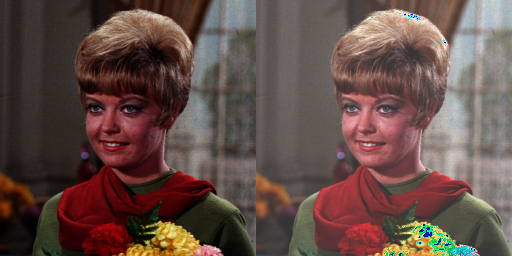

In [3]:
print('Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not an integer.')

female = cv.imread('/content/drive/MyDrive/PCVK/Images/Pertemuan3/female.tiff')
brightness_image = np.zeros(female.shape, female.dtype)

#akses per piksel
for y in range(female.shape[0]):
    for x in range(female.shape[1]):
        for c in range(female.shape[2]):
            brightness_image[y,x,c] = np.clip(female[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([female, brightness_image])
cv2_imshow(final_frame)

TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:  

In [ ]:
import matplotlib.pyplot as plt


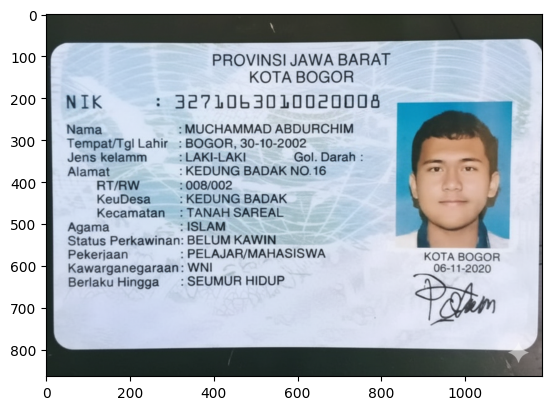

In [ ]:
# Load dan ubah ke RGB
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP_OHIM.png')
original_RGB = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Tampilkan hasil
plt.imshow(original_RGB)
plt.show()

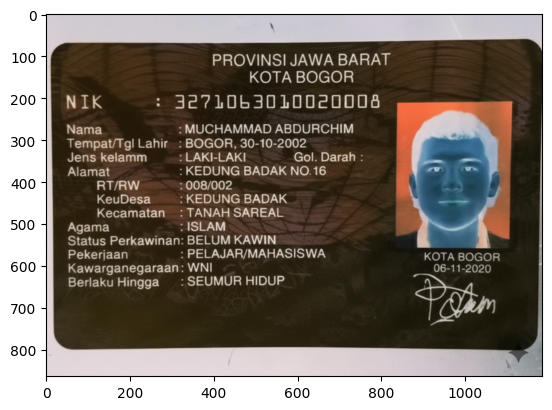

In [ ]:
inverse = 255 - original_RGB
plt.imshow(inverse)
plt.show()

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

In [ ]:
print("Mengubah kontras dan tingkat kecerahan citra")
print("---------------------------------------------------------")
# Input dari user
brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

# Terapkan brightness dan contrast
# Rumus: g(x,y) = a * f(x,y) + b
new_img = contrast * original + brightness
new_img = np.clip(new_img, 0, 255).astype(np.uint8)

# Tampilkan hasil
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
plt.title(f"Contrast={contrast}, Brightness={brightness}")

plt.show()

Mengubah kontras dan tingkat kecerahan citra
---------------------------------------------------------


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
---------------------------------------------------------
Masukkan nilai kecerahan: 50


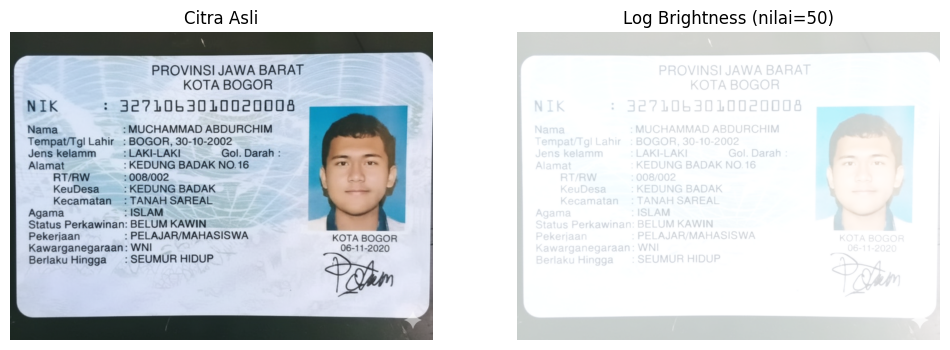

In [ ]:
print("Mengubah tingkat kecerahan citra dengan Transformasi Log")
print("---------------------------------------------------------")

# Input brightness dari user
brightness = int(input("Masukkan nilai kecerahan: "))

# Ubah tipe data jadi float32 agar aman untuk log
img_float = original_RGB.astype(np.float32)

# Hitung konstanta c
c = 255 / np.log(1 + np.max(img_float))

# Terapkan transformasi log brightness
log_result = c * np.log(1 + img_float + brightness)

# Pastikan hasil tetap dalam [0,255]
log_result = np.clip(log_result, 0, 255)
log_result = log_result.astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(original_RGB)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(log_result)
plt.title(f"Log Brightness (nilai={brightness})")
plt.axis("off")

plt.show()

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

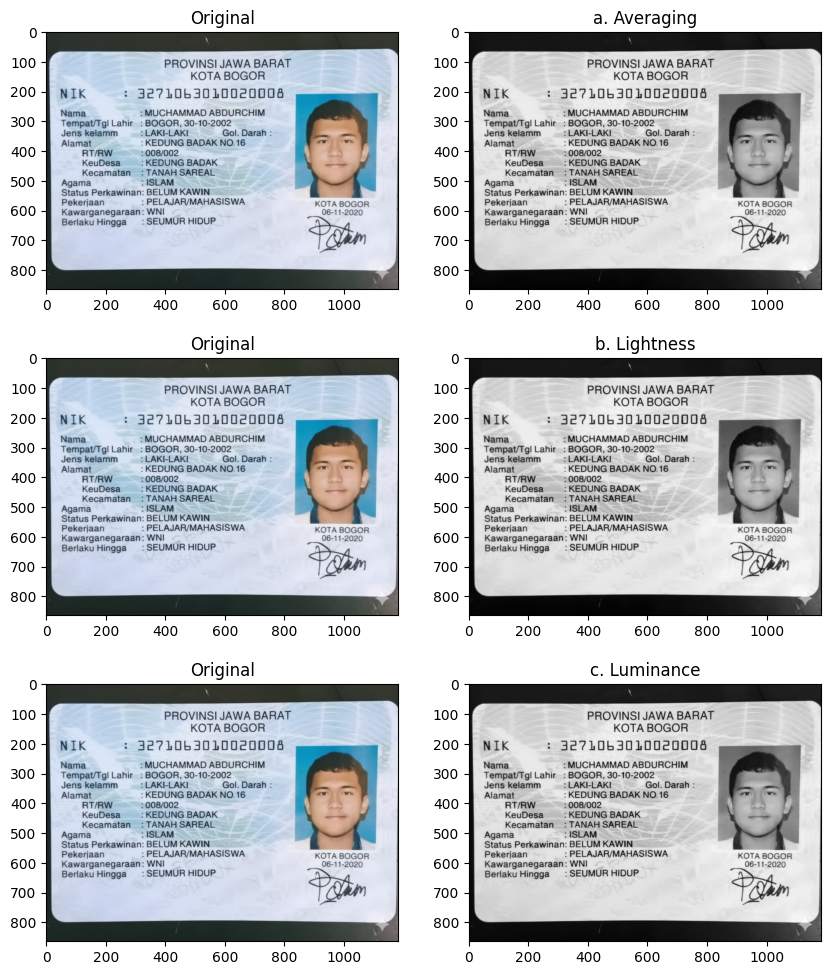

In [ ]:
# Ambil channel warna
R = original_RGB[:,:,0].astype(np.float32)
G = original_RGB[:,:,1].astype(np.float32)
B = original_RGB[:,:,2].astype(np.float32)

# ----------------- Metode Grayscale -----------------
# 1. Averaging
gray_avg = ((R + G + B) / 3).astype(np.uint8)

# 2. Lightness
gray_light = ((np.maximum(np.maximum(R, G), B) + np.minimum(np.minimum(R, G), B)) / 2).astype(np.uint8)

# 3. Luminance
gray_lum = (0.21*R + 0.72*G + 0.07*B).astype(np.uint8)

# ----------------- Tampilkan Hasil -----------------
plt.figure(figsize=(10,12))

# Original vs Averaging
plt.subplot(3,2,1)
plt.imshow(original_RGB)
plt.title("Original")

plt.subplot(3,2,2)
plt.imshow(gray_avg, cmap="gray")
plt.title("a. Averaging")

# Original vs Lightness
plt.subplot(3,2,3)
plt.imshow(original_RGB)
plt.title("Original")

plt.subplot(3,2,4)
plt.imshow(gray_light, cmap="gray")
plt.title("b. Lightness")

# Original vs Luminance
plt.subplot(3,2,5)
plt.imshow(original_RGB)
plt.title("Original")

plt.subplot(3,2,6)
plt.imshow(gray_lum, cmap="gray")
plt.title("c. Luminance")

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

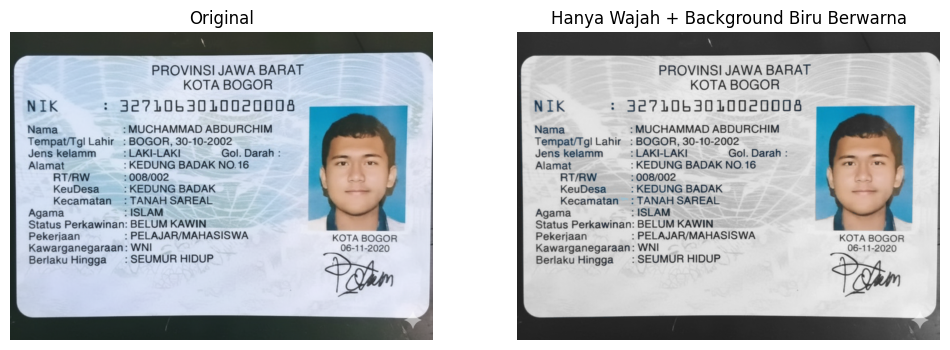

In [ ]:
# Buat grayscale
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_RGB = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

# Konversi ke HSV
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Range warna kulit (coba sesuaikan jika perlu)
lower_skin = np.array([0, 30, 60], dtype=np.uint8)
upper_skin = np.array([20, 150, 255], dtype=np.uint8)
mask_skin = cv.inRange(hsv, lower_skin, upper_skin)

# Range warna biru background
lower_blue = np.array([90, 70, 50], dtype=np.uint8)
upper_blue = np.array([130, 255, 255], dtype=np.uint8)
mask_blue = cv.inRange(hsv, lower_blue, upper_blue)

# Gabungkan mask
mask = cv.bitwise_or(mask_skin, mask_blue)

# Bagian berwarna dan grayscale
color_part = cv.bitwise_and(original_RGB, original_RGB, mask=mask)
gray_part  = cv.bitwise_and(gray_RGB, gray_RGB, mask=cv.bitwise_not(mask))
result = cv.add(color_part, gray_part)

# ----------------- Tampilkan Hasil -----------------
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(original_RGB)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Hanya Wajah + Background Biru Berwarna")
plt.axis("off")

plt.show()

D2. Operasi Aritmatika dan Logika

1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma (misal 0.5, 1.0, 2.0, 3.0): 3


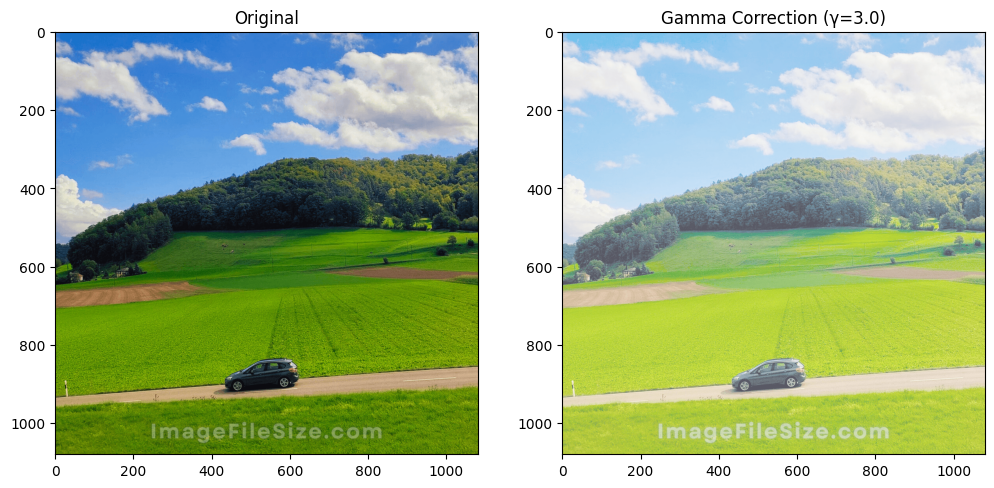

In [ ]:
# Baca citra mobil
original = cv.imread('/content/drive/MyDrive/PCVK/Images/Pertemuan3/car.tif')
car_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

print(' Gamma Correction pada citra ')
print('----------------------------------')

# Input gamma dengan error handling
try:
    gamma = float(input("Masukkan nilai Gamma (misal 0.5, 1.0, 2.0, 3.0): "))
except ValueError:
    print("Error, input bukan angka!")
    gamma = 1.0  # default

# Inverse gamma
invGamma = 1.0 / gamma

# Buat lookup table untuk percepatan
table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")

# Terapkan gamma correction
gamma_corrected = cv.LUT(car_rgb, table)

# ----------------- Tampilkan Hasil -----------------
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(car_rgb)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(gamma_corrected)
plt.title(f"Gamma Correction (γ={gamma})")

plt.show()


2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi
citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit).
Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0
(000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit.
Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

Masukkan nilai bit depth (1-7): 2


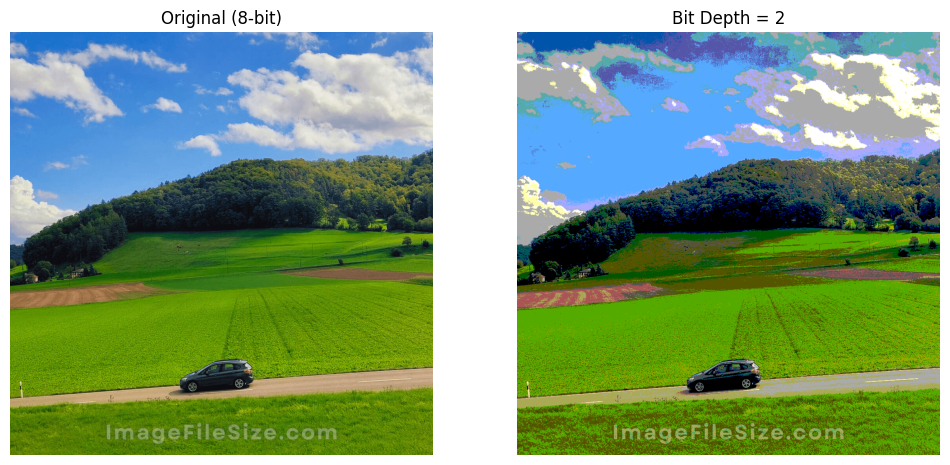

In [ ]:
# Input bit depth dari user
bit_depth = int(input("Masukkan nilai bit depth (1-7): "))

# Hitung level sesuai rumus
level = 255 / (pow(2, bit_depth) - 1)

# Terapkan transformasi bit depth
depth_image = np.round(car_rgb / level) * level
depth_image = depth_image.astype(np.uint8)

# ----------------- Tampilkan Hasil -----------------
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(car_rgb)
plt.title("Original (8-bit)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(depth_image)
plt.title(f"Bit Depth = {bit_depth}")
plt.axis("off")

plt.show()

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.  
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

In [ ]:
import glob
from math import log10, sqrt

# ----------------- Baca Citra -----------------
original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(cv.cvtColor(n, cv.COLOR_BGR2RGB))
cv_img = np.array(cv_img)

# ----------------- Hitung PSNR -----------------
# Rumus PSNR: 20*log10(255/sqrt(MSE))
def hitung_psnr(img1, img2):
    mse = np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    if mse == 0:
        return 100
    return 20 * log10(255.0 / sqrt(mse))

# ----------------- Average Denoising -----------------
jumlah_list = [10, 20, 40, 80, 100]
results = {}

for jumlah in jumlah_list:
    avg_img = np.mean(cv_img[:jumlah], axis=0).astype(np.uint8)
    psnr_val = hitung_psnr(original_rgb, avg_img)
    results[jumlah] = (avg_img, psnr_val)

# ----------------- Tampilkan Hasil -----------------
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(original_rgb)
plt.title("Original")
plt.axis("off")

i = 2
for jumlah, (avg_img, psnr_val) in results.items():
    plt.subplot(2,3,i)
    plt.imshow(avg_img)
    plt.title(f"Average {jumlah} citra\nPSNR={psnr_val:.2f} dB")
    plt.axis("off")
    i += 1

plt.show()

# ----------------- Cetak Nilai PSNR -----------------
print("Hasil PSNR (dB):")
print("----------------")
for jumlah, (_, psnr_val) in results.items():
    print(f"{jumlah} citra : {psnr_val:.2f} dB")

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
